MainProcess


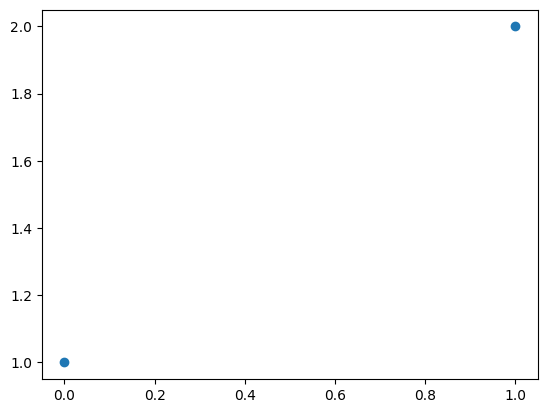

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [2]:
res_dir = fls.result_dir + '/many_abbr_res/'
# import shutil
# temp_dir = fls.temp_dir + '/temptemp/'
# fls.remove_and_make_dir(res_dir)
# fls.remove_and_make_dir(temp_dir)
# fls.download_kaggle_dataset('jeroencottaar/byu-many-models-abbreviated/', temp_dir)
# shutil.copytree(temp_dir, res_dir, dirs_exist_ok=True)
# fls.download_kaggle_dataset('jeroencottaar/byu-many-models-abbreviated-2/', temp_dir)
# shutil.copytree(temp_dir, res_dir, dirs_exist_ok=True)
# fls.download_kaggle_dataset('jeroencottaar/byu-many-models-abbreviated-3/', temp_dir)
# shutil.copytree(temp_dir, res_dir, dirs_exist_ok=True)

In [3]:
files = glob.glob(res_dir + 'Baseline_9_332*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
test_data = loaded_data.test_data
print(loaded_data.modifier_values)


{'seed': 9, 'n_ensemble': 4, 'concentration': 1, 'extra_data': True, 'trust_neg': 2, 'trust_extra': 4, 'negative_label_threshold': 0.6301574075025781, 'target_voxel_spacing': 23.887670414600894, 'blur_xy': 36.48223888810696, 'blur_z': 15.0, 'scale_moving_std': True, 'scale_moving_average_size': 2573, 'scale_moving_std_size_fac': 1.4591188145243812, 'blur_xy_moving_std': 1.5952640680558328, 'clip_value': 2.9372480001295087, 'scale_percentile_value': 2.969888653954576, 'img_size': 640, 'box_size': 15, 'n_epochs': 54, 'use_best_epoch': False, 'lr0': 0.0013559652968235714, 'cos_lr': True, 'dropout': 0.09833022442861755, 'weight_decay': 0.00025780174498913656, 'box': 6.468667966063088, 'model_name': 'yolov8s', 'use_pretrained_weights': False, 'mosaic_mode': 0.2991810731982467, 'translate': 0.1, 'scale': 0.3479115269119004, 'mixup': 0.15651818306562632, 'erasing': 0.3950962987578307, 'hsv_h': 0.014793578239203577, 'hsv_s': 0.618003796897673, 'hsv_v': 0.3651240207135672, 'fliplr': 0.5, 'flipu

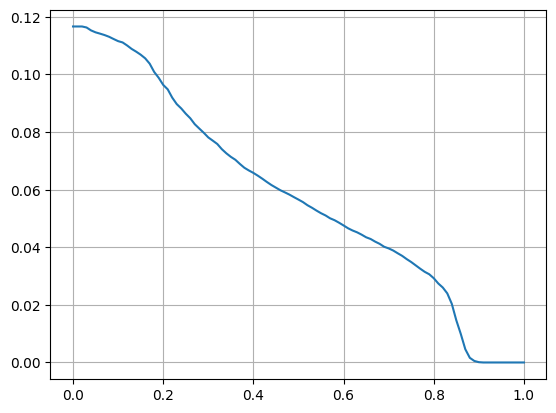

In [16]:
c_vals = np.linspace(0,1,101)
res=[]
for c_val in c_vals:
    z_seen = 0
    z_tot = 0
    for t,i in zip(loaded_data.test_data, loaded_data.inferred_test_data):
        if not 'tomo' in t.name:
            continue
        z_list=[]
        lab = i.labels_unfiltered2.reset_index()
        for i_i in range(len(i.labels_unfiltered2)):
            if lab['confidence'][i_i]>c_val:
                z_list.append(lab['z'][i_i])
        z_list = np.unique(z_list)
        z_seen+=len(z_list)
        z_tot+=t.data_shape[0]
    res.append(z_seen/z_tot)
plt.figure()
plt.plot(c_vals,res)
plt.grid(True)